 # Business Case: Employee Performance Analysis at INX Future Inc.
 INX Future Inc., a global leader in data analytics and automation, has recently seen a decline in employee performance, with client satisfaction dropping by 8% and service delivery escalations rising. To address this, the CEO has initiated a data science project to identify department-wise performance gaps, uncover the top factors affecting employee productivity, and build a predictive model for future hiring. The project will also provide actionable recommendations to improve employee performance while maintaining morale and INX’s strong employer brand.

In [2]:
# import basic libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("INX_Future_Inc_Employee_Performance_CDS_Project2.csv")
df

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

# Domain Analysis 

#### Mr Brain, CEO of the INX Future Inc data analytics and automation solutions provider wants us to create an interactive dashboard to analyse the employee performance indexes and track the core underlying causes of their performance issues (clear indicators of non-performing employees).

##### **EmpNumber**  – Unique employee ID/identifier. Used only for reference, not predictive.

##### **Age** – Age of the employee (in years). Helps understand maturity, career stage, and possible impact on performance.

##### **Gender** – Gender of the employee. Can help study diversity impact but should be treated cautiously to avoid bias.

##### **EducationBackground** – Employee’s field of education (e.g., Technical, Marketing, Human Resources). May influence job suitability and performance.
##### **MaritalStatus** – Employee’s marital status (Single, Married, Divorced, etc.). Sometimes affects work–life balance and mobility.

##### **EmpDepartment** – Department where the employee works (e.g., Sales, HR, Development). Critical to analyze department-level performance.

##### **EmpJobRole** – Specific job role/title (e.g., Manager, Developer, Analyst). Helps identify role-based performance variations.

##### **BusinessTravelFrequency** – How often the employee travels for business (Rarely, Frequently, etc.). Travel workload may influence satisfaction and performance.

##### **DistanceFromHome** – Distance between employee’s home and workplace (in km or miles). Long distances may reduce work-life balance and productivity.

##### **EmpEducationLevel**– Education level (1–5 scale). Shows qualification level, which may correlate with job level/performance.1 'Below College' 2.'College' 3.'Bachelor' 4.'Master' 5.'Doctor'
	
##### **EmpEnvironmentSatisfaction** – Satisfaction with work environment (scale, usually 1–4). Reflects how comfortable employees feel in their workplace.1.'Low'2.'Medium'3.'High'	4.'Very High'
	
##### **EmpHourlyRate** – Hourly wage of the employee. Affects motivation and retention.

##### **EmpJobInvolvement** – Degree of involvement/commitment to job (scale, usually 1–4). High involvement generally means better performance.1.'Low' 2.'Medium' 3.'High' 4.'Very High'

##### **EmpJobLevel** – Job level/grade (e.g., entry, mid, senior). Indicates seniority and responsibility.

##### **EmpJobSatisfaction** – Employee’s satisfaction with their job (scale, usually 1–4). Directly affects performance and attrition.1.'Low' 2.'Medium'3.'High' 4.'Very High'.
	
##### **NumCompaniesWorked** – Number of companies the employee has worked for before INX. Reflects stability and career mobility.

##### **OverTime** – Whether the employee works overtime (Yes/No). Excess overtime may lead to burnout and reduced satisfaction.

##### **EmpLastSalaryHikePercent** – Percentage salary increase received in the last appraisal. Impacts motivation and perception of fairness.

##### **EmpRelationshipSatisfaction**– Satisfaction with relationships at work (scale, usually 1–4). Healthy relationships encourage collaboration and productivity.1.'Low'2. 'Medium'3.'High'4.'Very High'

##### **TotalWorkExperienceInYears** – Total career experience across all companies. Indicates maturity, skill depth, and career stage.

##### **TrainingTimesLastYear** – Number of training sessions attended last year. More training often leads to skill enhancement and better performance.

##### **EmpWorkLifeBalance** – Work–life balance satisfaction (scale, usually 1–4). Imbalance can hurt performance and retention.1.'Bad' 2.'Good' 3. 'Better' 4.'Best'
	
##### **ExperienceYearsAtThisCompany** – Number of years the employee has been with INX. Shows loyalty and organizational familiarity.

##### **ExperienceYearsInCurrentRole** – Years of experience in the current job role. Indicates specialization and comfort in current responsibilities.

##### **YearsSinceLastPromotion** – Number of years since the employee’s last promotion. Long gaps may affect motivation and performance.

##### **YearsWithCurrManager** – Number of years working under the current manager. Affects employee–manager relationship and satisfaction.

##### **Attrition** – Whether the employee has left the company (Yes/No). Target variable in attrition analysis but also useful context for performance.

##### **PerformanceRating** – Employee’s performance score (e.g., scale 1–4 or 1–5). 1.'Low' 2.'Good' 3.'Excellent'4.'Outstanding' This is the main target variable for predicting performance.


##### Identify the factors influencing employee performance

##### Build a predictive model for future employee performance (e.g., for hiring)

##### Provide data-driven recommendations to improve performance

##### The dataset contains 1200 records, each representing an employee.

##### There are 28 features (columns), including demographic info, job roles, experience, training, satisfaction scores, and finally the target: PerformanceRating.

### Basic Checks

In [9]:
df.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [10]:
df.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [12]:
df.shape

(1200, 28)

In [13]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [14]:
df.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [15]:
df.describe(include='O')

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

# Exploratory Data Analysis(EDA)

## Univariate 

#### Categorical Feature distribution

In [19]:
# Select columns with object or category dtype
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols.tolist())


Categorical Columns: ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


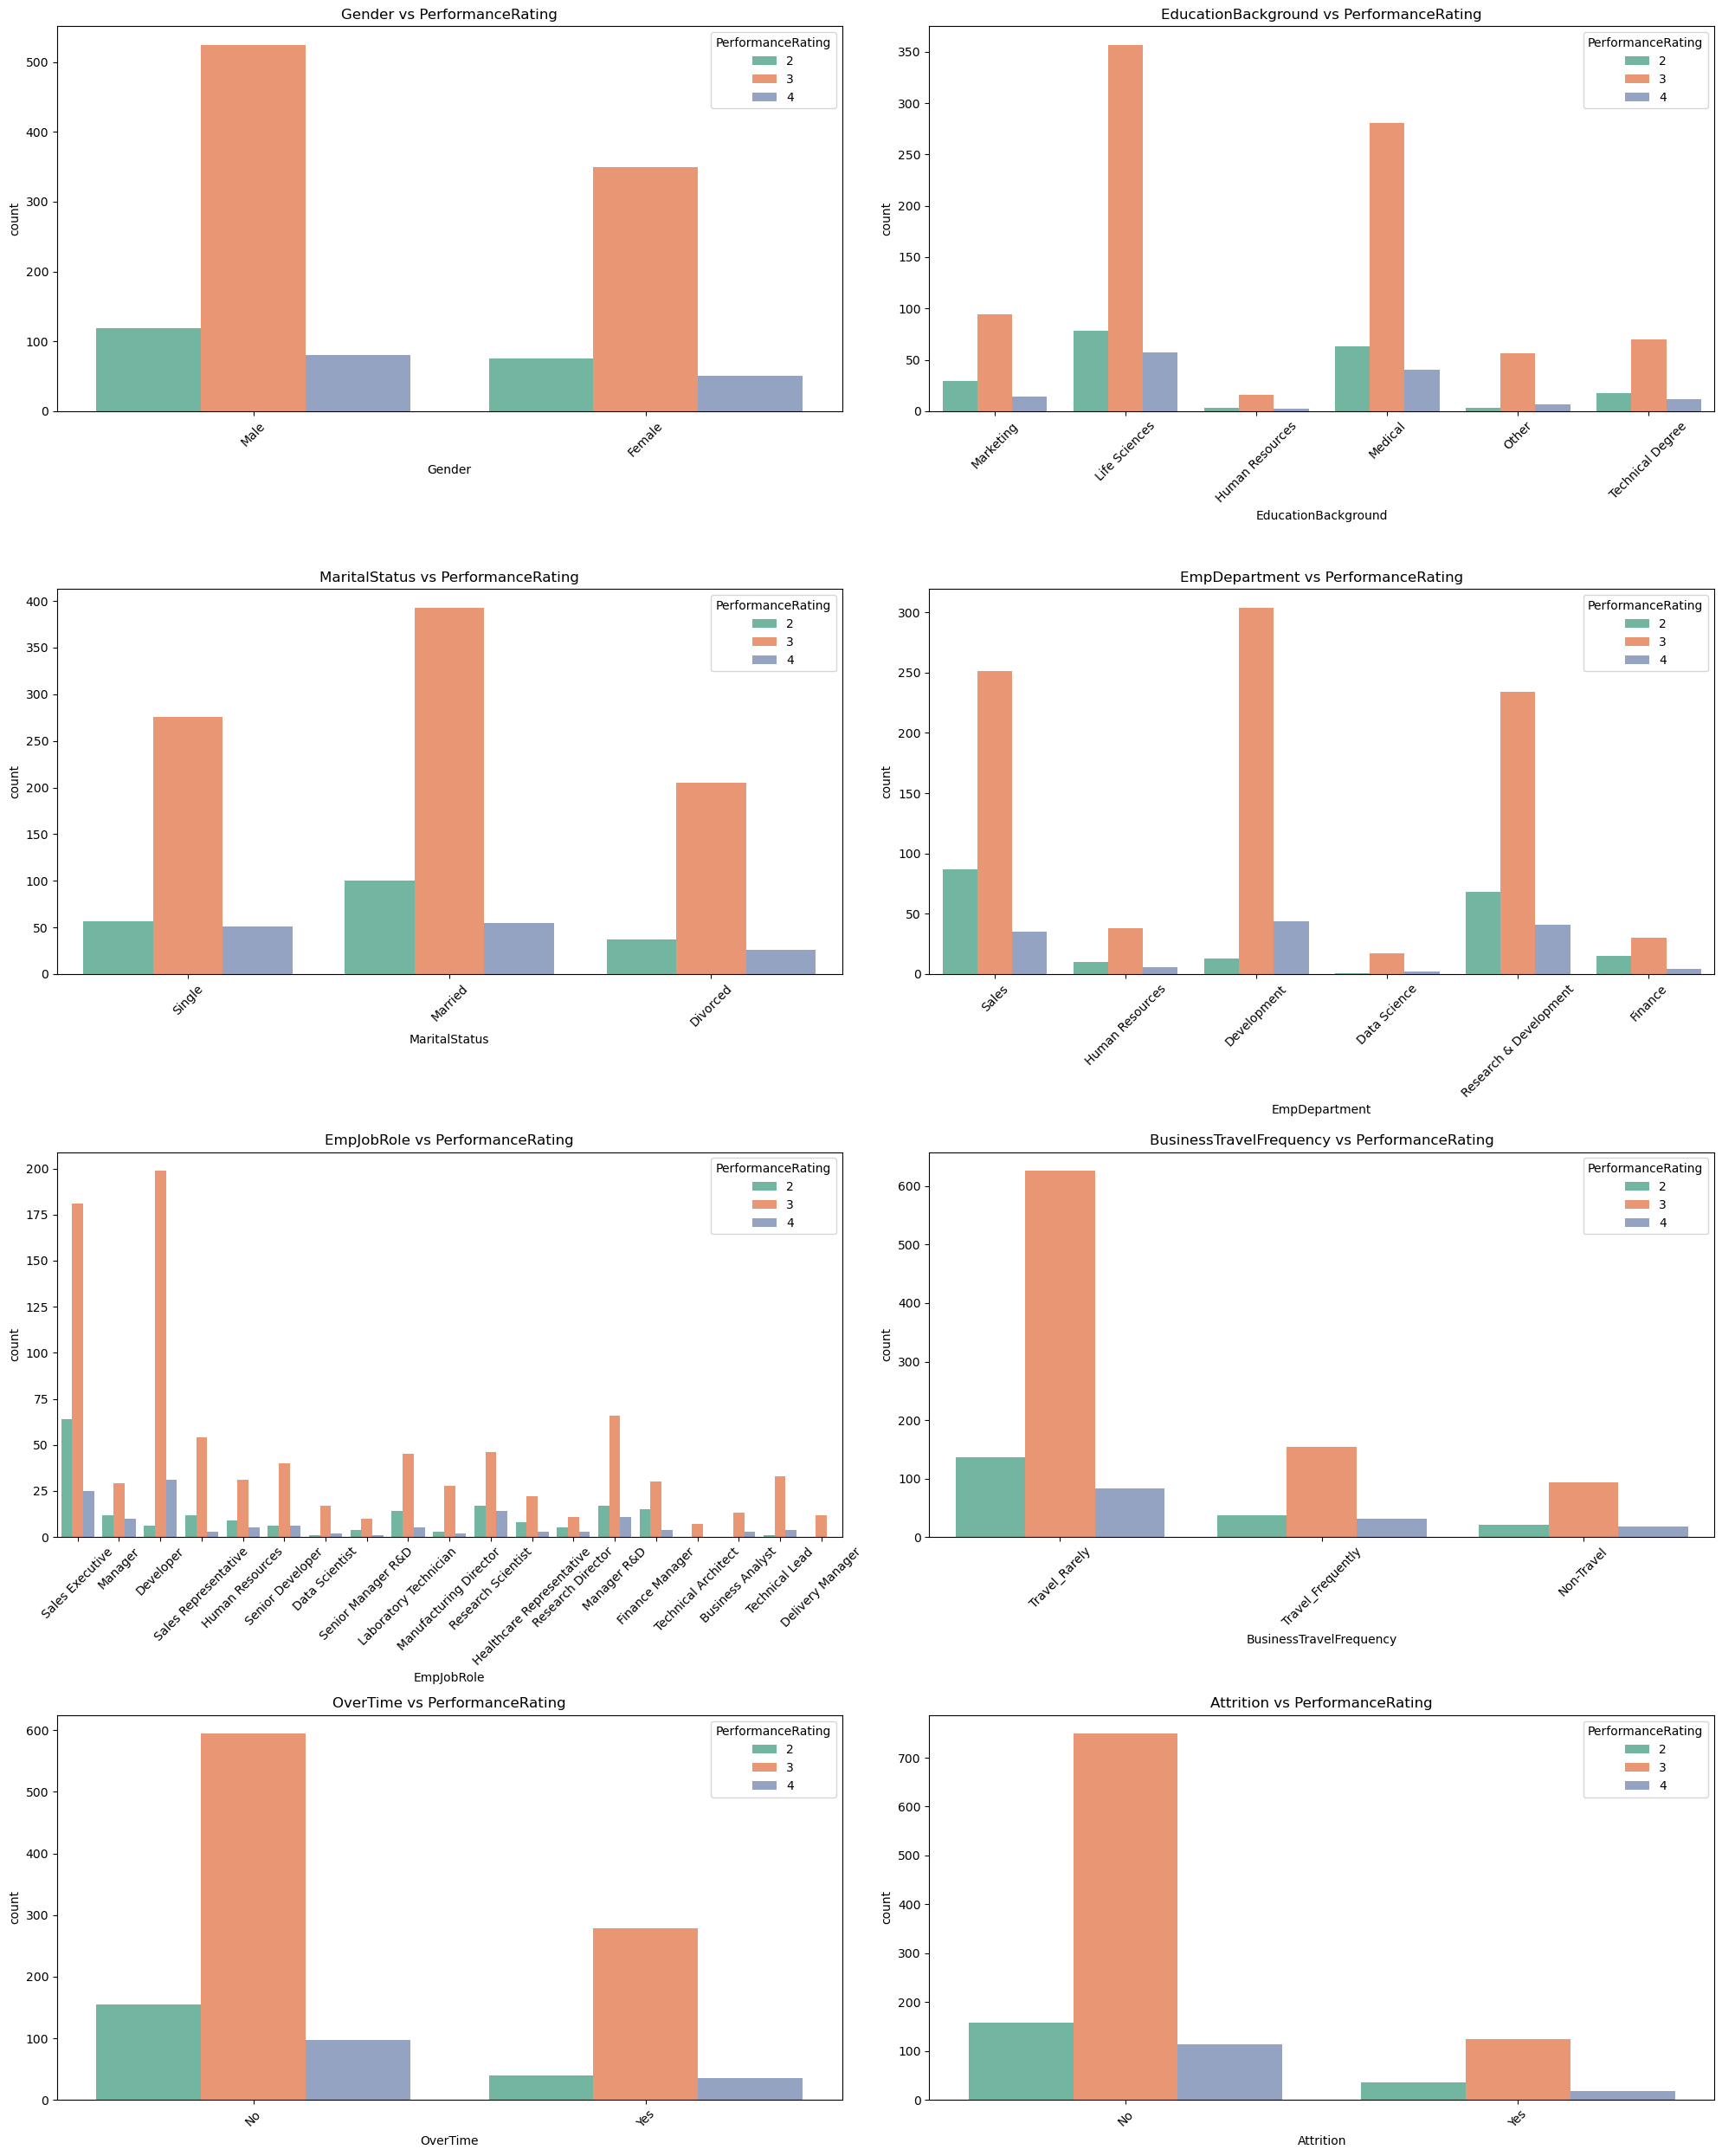

In [20]:
categorical_cols = [
    'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
    'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'
]
# Plot countplots for each categorical variable vs target
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)   # Adjust rows/cols depending on number of plots
    sns.countplot(x=col, hue='PerformanceRating', data=df, palette="Set2")
    plt.title(f"{col} vs PerformanceRating")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### INSIGHTS:


#### Gender vs Performance:
1.If one gender has higher performance → Male employees tend to perform slightly better then female.
2.Gender does not play a significant role in performance.”

#### EducationBackground vs Performance: 
1.Employees from Life Sciences and Medical backgrounds had higher performance ratings compared to Marketing and HR.

#### Marital Status vs Performance:
1.Married employees showed slightly higher performance than single employees, possibly due to stability factors.
2.Divorced being are minority class 

#### EmpDepartment vs Performance:
1.Sales and Development employees scored higher performance ratings, while HR and Finance had lower averages.
2.Departmental differences indicate training focus should be placed in HR and Finance.
3.Data science has lower averages other then HR and finance.

#### EmpJobRole vs Performance:
1.Sales excecutive and Senior Developers had higher performance ratings compared to other Support staff.
2.Role like Data scientist, Manager, senior department, Health Represtentive Research director are few average but hold higher responsibility.

#### BusinessTravelFrequency vs Performance:
 1.Employees who travel frequently showed lower performance scores, suggesting travel fatigue impacts productivity.”

#### OverTime vs Performance:
1.Employees with frequent overtime had lower performance ratings.
2.Employees doing overtime showed higher commitment, reflected in performance.”

#### Attrition vs Performance:
1.Employees with higher attrition risk showed lower performance ratings, meaning retention strategies should focus on them.

In [30]:
# Compare categorical columns vs target
categorical_cols = ['EmpNumber']

for col in categorical_cols:
    print(f"\n--- {col} vs PerformanceRating ---")
    print(df.groupby(col)['PerformanceRating'].mean().sort_values(ascending=False))



--- EmpNumber vs PerformanceRating ---
EmpNumber
E1002036    4.0
E100724     4.0
E1002313    4.0
E1002314    4.0
E1001307    4.0
           ... 
E1002271    2.0
E1001485    2.0
E1002264    2.0
E100338     2.0
E100998     2.0
Name: PerformanceRating, Length: 1200, dtype: float64


### Numerical Feature distributed

In [32]:
# Select only numerical columns (int and float types)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical Columns:")
print(numerical_cols)


Numerical Columns:
['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']


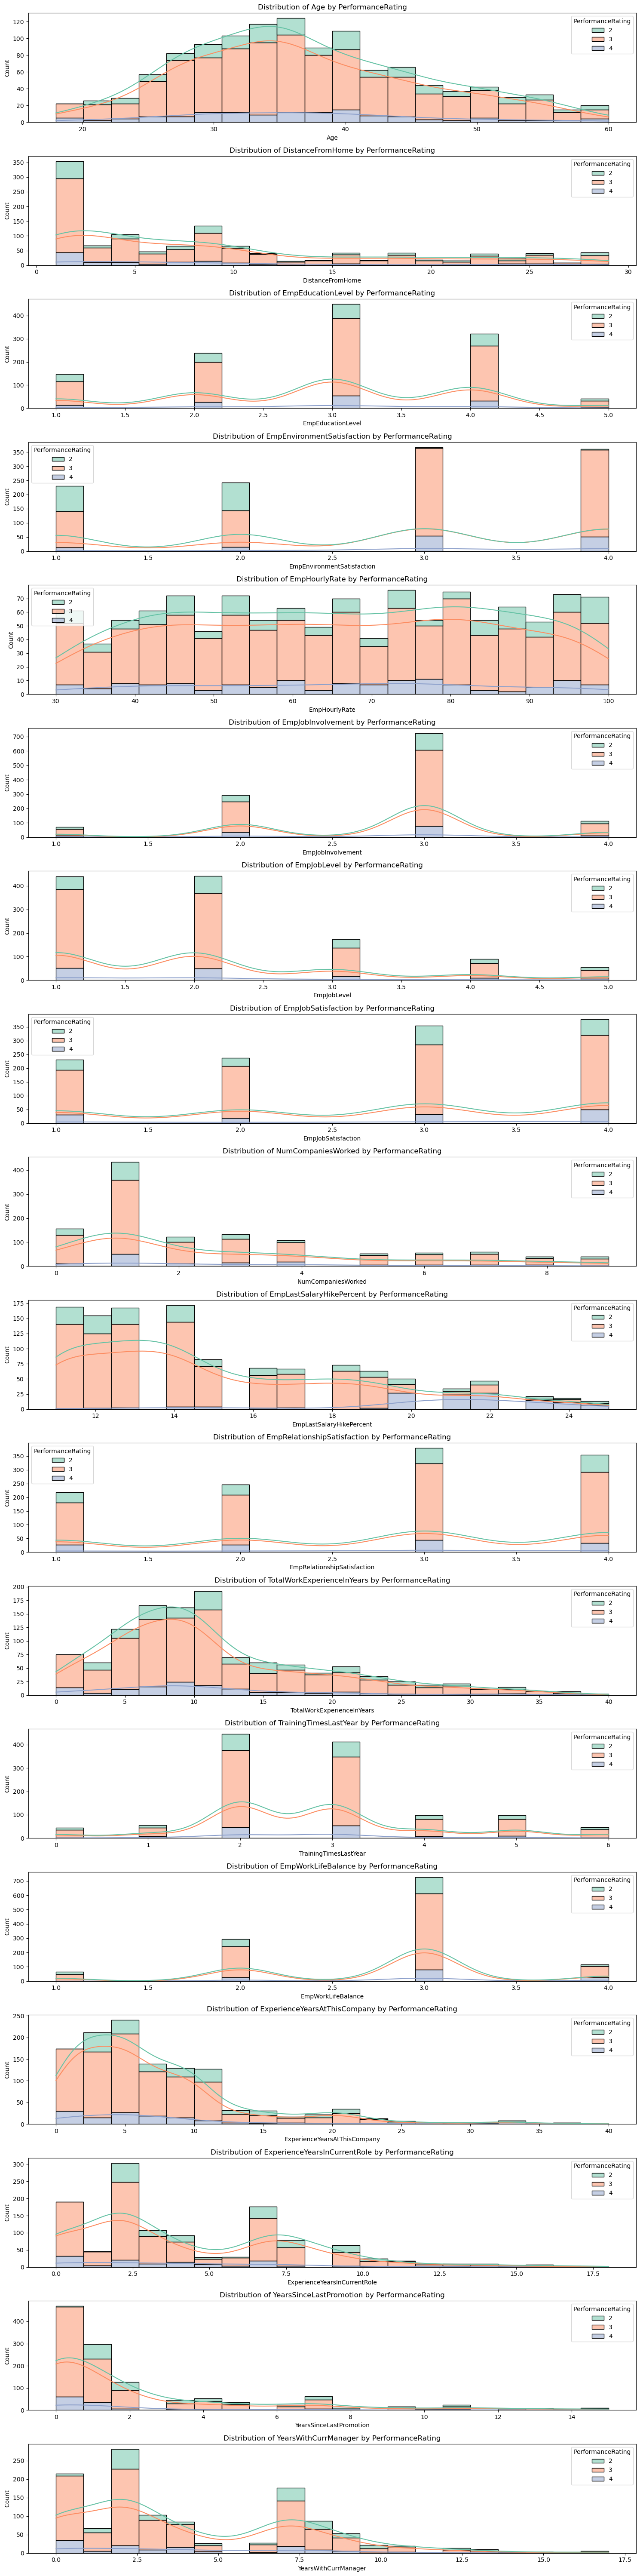

In [33]:

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Remove target column from numerical list
if 'PerformanceRating' in numerical_cols:
    numerical_cols.remove('PerformanceRating')

# Plot histograms with hue
plt.figure(figsize=(15, 60))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.histplot(data=df, x=col, hue='PerformanceRating', bins=20, kde=True, multiple="stack", palette="Set2")
    plt.title(f"Distribution of {col} by PerformanceRating")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()


#### Insights for Numerical Columns (Histplot with PerformanceRating)
#### Age

Yonger Age of employees between 20-30 years are show higher performance.
Older employees (40+) are more evenly spread across ratings, suggesting mixed performance.

#### DistanceFromHome

Employees closer to the office (0–10 km) are slightly more concentrated in higher ratings.

Those with long commites (>20 km) show weaker performance .

#### EmpEducationLevel

Higher education levels (4–5) show balanced distribution across all performance ratings.

Middle education levels (2–3) are more concentrated in higher ratings.

#### EmpEnvironmentSatisfaction

High satisfaction levels (3–4) skew strongly toward better performance ratings.

Low satisfaction (1) overlaps mostly with poor performance.

#### EmpHourlyRate

Hourly rate distribution is fairly uniform across performance ratings.

No strong differentiation, suggesting it is not a key driver of performance.

#### EmpJobInvolvement

Higher involvement (3–4) aligns with top performance.

Low involvement (1–2) clusters around lower performance ratings.

#### EmpJobLevel

level roles (1-2) show higher density in good performance.
level low roles(3-5) show lower density in the performance.

#### EmpJobSatisfaction

Employees with satisfaction levels 3–4 dominate higher performance ratings.

Low satisfaction (1–2) tends to align with weaker ratings.

#### NumCompaniesWorked

Moderate job movers (1–4 companies) show better performance.

Very high movers (>6) or very stable.

#### EmpLastSalaryHikePercent

Higher salary hikes (10–15%) correlate with stronger performance ratings.

Lower hikes (<5%) are mostly associated with weaker performance.

#### EmpRelationshipSatisfaction

High relationship satisfaction (3–4) aligns with better performance.

Lower values (1–2) cluster with weaker ratings.

#### TotalWorkExperienceInYears

Employees with 5–15 years of experience are concentrated in higher ratings.

Very new (<2 years) and very senior (>20 years) employees overlap with lower ratings.

#### TrainingTimesLastYear

Moderate training frequency (2–3 times) shows higher density in strong performance ratings.

Very low (0) or very high (>5) training frequencies appear in weaker performers.

#### EmpWorkLifeBalance

Balanced employees (level 3) dominate higher performance.

Poor balance (1–2) overlaps more with weaker ratings.

#### ExperienceYearsAtThisCompany

Mid-tenure employees (3–8 years) skew toward higher performance.

Very high tenure (>15 years) shows reduced density of top ratings.

#### ExperienceYearsInCurrentRole

2–6 years in the same role shows peak performance.

Too short (<1 year) or too long (>10 years) spreads across lower ratings.

#### YearsSinceLastPromotion

Recently promoted employees (0–2 years) dominate top ratings.

Long gaps (>6 years) align with weaker performance.

#### YearsWithCurrManager

Employees with 2–5 years under the same manager show higher ratings.

Very short (<1 year) or very long (>10 years) relationships weak performance.

#### PerformanceRating (Target)

Distribution shows majority of employees fall in mid to high ratings.

Very low ratings are less frequent, but align with dissatisfaction factors (environment, job, involvement

#### OverAll Summary 

Satisfaction factors (EmpJobSatisfaction, EmpEnvironmentSatisfaction, EmpRelationshipSatisfaction, EmpWorkLifeBalance) are strongly linked with higher performance.

Engagement factors (EmpJobInvolvement, YearsSinceLastPromotion, TrainingTimesLastYear) show clear influence on ratings.

Experience & tenure (moderate values) correlate with peak performance, while extremes (too low or too high) weaken it.

Compensation & growth (EmpLastSalaryHikePercent, promotions) align closely with top performers.

Demographics (Age, DistanceFromHome, EducationBackground) have weaker but noticeable effects.

## Bivariate 

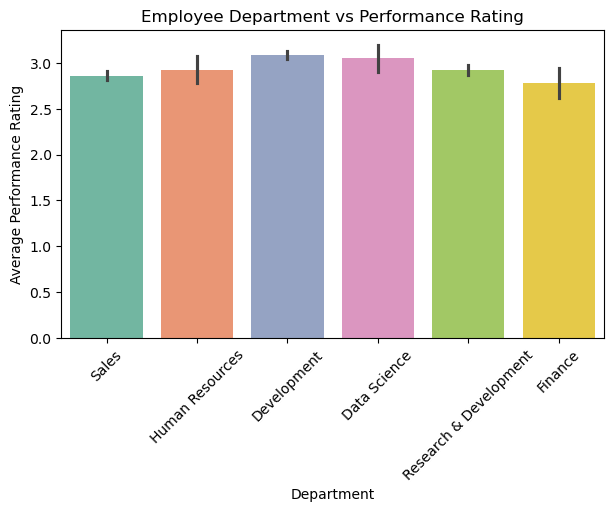

In [36]:
plt.figure(figsize=(7,4))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=df, palette="Set2")
plt.title("Employee Department vs Performance Rating")
plt.xlabel("Department")
plt.ylabel("Average Performance Rating")
plt.xticks(rotation=45)
plt.show()


### Insight:
1.Average performance ratings vary across departments. Some departments consistently achieve higher rating

# Data Preprocessing 

In [39]:
df

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [40]:
# Checking the dataset for any missing values 
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [41]:
# there are no missing values in the dataset 

### Encoding 

In [43]:
df.info() # to check the dtype of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [44]:
df

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()   # Step 1: Create LabelEncoder object

for i in (2,3,4,5,6,7,16,26):   # Step 2: Loop through column indexes
    df.iloc[:,i] = encoder.fit_transform(df.iloc[:,i])   # Step 3: Encode each column


In [46]:
df

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
0     E1001000   32      1                   2             2             5   
1     E1001006   47      1                   2             2             5   
2     E1001007   40      1                   1             1             5   
3     E1001009   41      1                   0             0             3   
4     E1001010   60      1                   2             2             5   
...        ...  ...    ...                 ...           ...           ...   
1195   E100992   27      0                   3             0             5   
1196   E100993   37      1                   1             2             1   
1197   E100994   50      1                   3             1             1   
1198   E100995   34      0                   3             2             0   
1199   E100998   24      0                   1             2             5   

     EmpJobRole BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0            13                       2                10                  3   
1            13                       2                14                  4   
2            13                       1                 5                  4   
3             8                       2                10                  4   
4            13                       2                16                  4   
...         ...                     ...               ...                ...   
1195         13                       1                 3                  1   
1196         15                       2                10                  2   
1197         15                       2                28                  1   
1198          1                       2                 9                  3   
1199         13                       2                 3                  2   

      ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0     ...                            4                          10   
1     ...                            4                          20   
2     ...                            3                          20   
3     ...                            2                          23   
4     ...                            4                          10   
...   ...                          ...                         ...   
1195  ...                            2                           6   
1196  ...                            1                           4   
1197  ...                            3                          20   
1198  ...                            2                           9   
1199  ...                            1                           4   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                         2                   2                            10   
1                         2                   3                             7   
2                         2                   3                            18   
3                         2                   2                            21   
4                         1                   3                             2   
...                     ...                 ...                           ...   
1195                      3                   3                             6   
1196                      2                   3                             1   
1197                      3                   3                            20   
1198                      3                   4                             8   
1199                      3                   3                             2   

      ExperienceYearsInCurrentRole YearsSinceLastPromotion  \
0                                7                       0   
1                                7                       1   
2                               13                       1   
3                                6           

<Figure size 2000x2500 with 0 Axes>

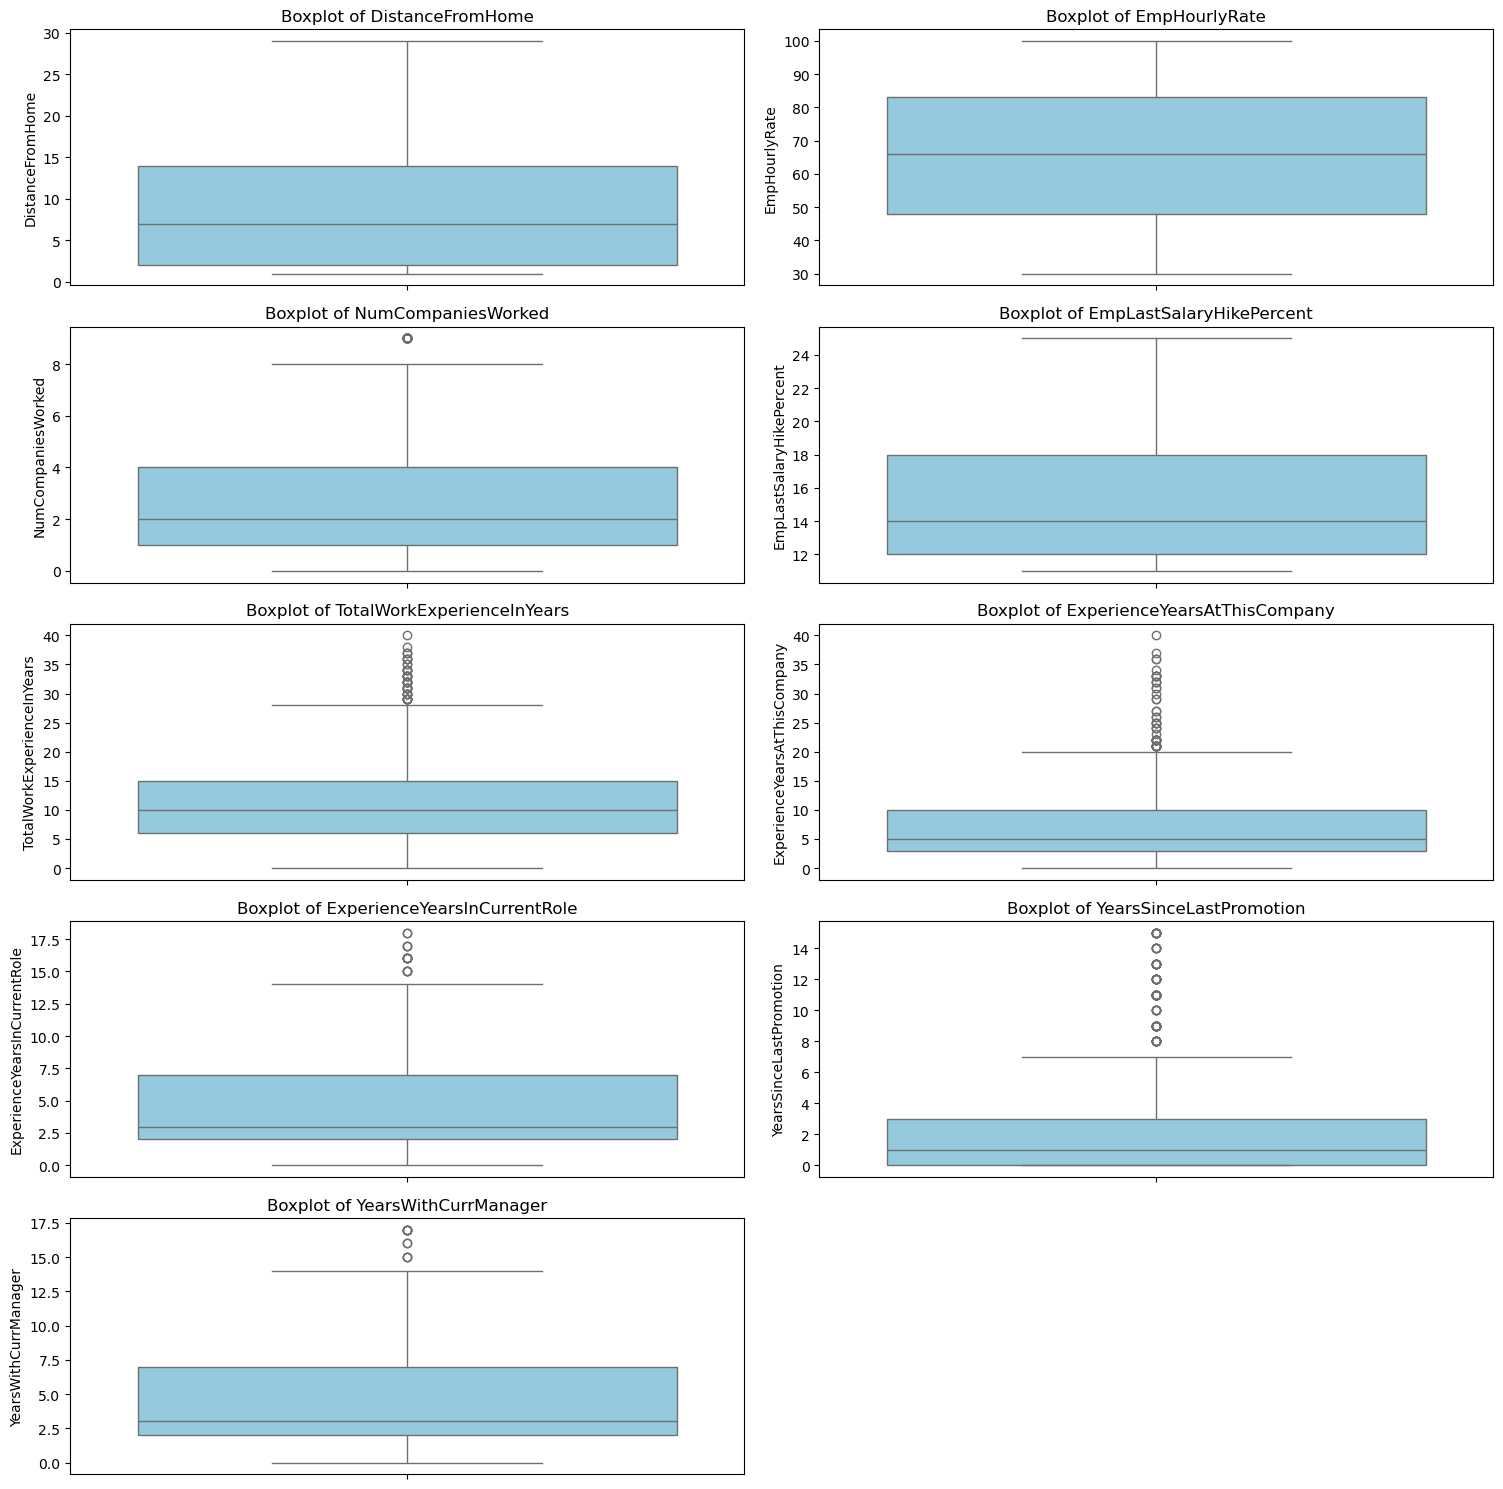

In [47]:
# Columns to check for outliers
plt.figure(figsize=(20,25))
plotnumber=1
outlier_cols = [
     'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked',
    'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
    'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]
plt.figure(figsize=(15, 15))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(5, 2, i)  # 5 rows, 2 columns of plots
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}", fontsize=12)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


In [48]:
# Encode Attrition (Yes=1, No=0)
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

# Encode OverTime as well
df['OverTime'] = le.fit_transform(df['OverTime'])

# Correct feature names from dataset
important_features = [
    'EmpJobSatisfaction', 
    'OverTime', 
    'EmpWorkLifeBalance', 
    'Age', 
    'EmpHourlyRate',   #  don’t have MonthlyIncome
    'ExperienceYearsAtThisCompany'
]

# Calculate correlation with Attrition
correlation = df[important_features + ['Attrition']].corr()['Attrition'].drop('Attrition')

# Take absolute values
correlation = correlation.abs()

# Plot Pie Chart
plt.figure(figsize=(8,8))
plt.pie(correlation, labels=correlation.index, autopct='%1.1f%%', startangle=140)
plt.title("Influence of Key Factors on Attrition")
plt.show()



## Insights 
##### OverTime has the biggest influence – employees working extra hours are more likely to leave.

##### Job Satisfaction is another strong factor – lower satisfaction increases attrition.

##### Work Life Balance plays a key role – poor balance pushes employees to quit.

##### Age also matters – younger employees show higher attrition compared to older ones.

##### Hourly Rate (salary) has some effect – employees with lower pay tend to leave.

##### Experience at the company – people with fewer years at the company are more likely to resign.

## Handling Outliers 

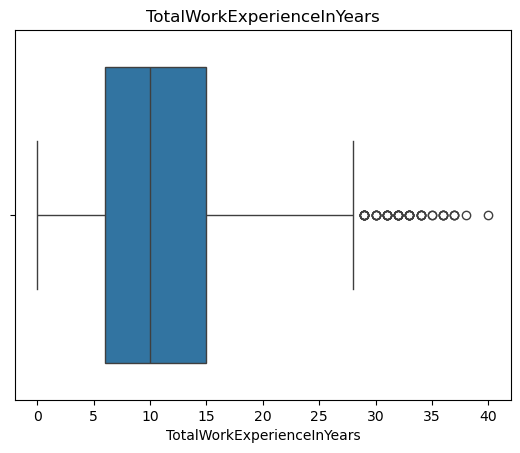

In [51]:
# Handling outliers for TotalWorkExperienceInYear
sns.boxplot(x=df.TotalWorkExperienceInYears)
plt.title('TotalWorkExperienceInYears')
plt.show()

In [52]:
df['TotalWorkExperienceInYears'].skew()

1.0868618597364565

In [53]:
Q1=df['TotalWorkExperienceInYears'].quantile(0.25)
Q1

6.0

In [54]:
Q3=df['TotalWorkExperienceInYears'].quantile(0.75)
Q3

15.0

In [55]:
IQR=Q3-Q1
IQR

9.0

In [56]:
lower_bound=Q1-(1.5*IQR)
lower_bound 

-7.5

In [57]:
upper_bound=Q3+(1.5*IQR)
upper_bound 

28.5

In [58]:
df.loc[df['TotalWorkExperienceInYears']<lower_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [59]:
df.loc[df['TotalWorkExperienceInYears']>upper_bound]

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
17    E1001040   56      1                   3             1             1   
25    E1001054   52      1                   2             1             5   
48    E1001093   50      1                   3             1             1   
72    E1001129   51      0                   2             1             5   
77    E1001140   53      0                   2             1             5   
96    E1001179   53      0                   1             2             1   
100   E1001183   50      1                   1             0             1   
149   E1001275   50      1                   3             0             1   
173   E1001310   59      0                   1             2             4   
178   E1001316   52      0                   2             1             5   
192   E1001339   50      1                   3             1             4   
199   E1001352   55      1                   3             2             4   
277   E1001493   50      0                   3             1             4   
292   E1001523   54      0                   1             0             4   
295   E1001528   54      1                   1             1             4   
308   E1001556   55      1                   3             0             4   
312   E1001560   51      1                   1             0             5   
342   E1001616   56      1                   1             2             3   
347   E1001630   51      1                   1             0             3   
351   E1001638   58      0                   3             1             4   
356   E1001645   51      0                   5             2             4   
361   E1001651   56      1                   1             1             4   
387   E1001700   54      0                   3             2             4   
388   E1001701   58      0                   3             1             4   
424   E1001762   49      1                   1             0             4   
450   E1001817   50      1                   3             2             4   
471   E1001850   53      0                   5             1             4   
475   E1001856   55      1                   2             1             5   
490   E1001884   50      1                   3             1             2   
525   E1001939   49      0                   1             1             2   
528   E1001943   54      0                   3             1             2   
589   E1002048   55      1                   3             1             4   
615   E1002102   58      1                   3             0             5   
642   E1002145   48      1                   1             1             4   
678   E1002216   58      0                   1             1             5   
703   E1002251   55      1                   0             1             3   
777    E100301   53      0                   1             1             5   
816    E100358   50      0                   3             0             1   
845    E100409   58      1                   3             2             5   
867    E100443   58      0                   3             1             1   
921    E100537   52      1                   1             1             1   
958    E100601   50      0                   3             0             5   
962    E100607   52      1                   1             2             5   
989    E100652   55      1                   3             2             1   
1077   E100783   55      0                   1             2             1   
1101   E100824   52      0                   1             1             0   
1104   E100827   60      0                   1             1             1   
1116   E100846   57      1                   2             0             5   
1135   E100875   55      0                   1             2             5   
1156   E100916   49      1                   1             0             1   
1160   E100922   50      1 

In [60]:
len(df.loc[df['TotalWorkExperienceInYears']>upper_bound])/len(df)*100

4.25

In [61]:
df.loc[df['TotalWorkExperienceInYears']>upper_bound,'TotalWorkExperienceInYears']=df['TotalWorkExperienceInYears'].median()

In [62]:
# Outliers are handle 
sns.boxplot(x=df.TotalWorkExperienceInYears)
plt.title('TotalWorkExperienceInYears')
plt.show()

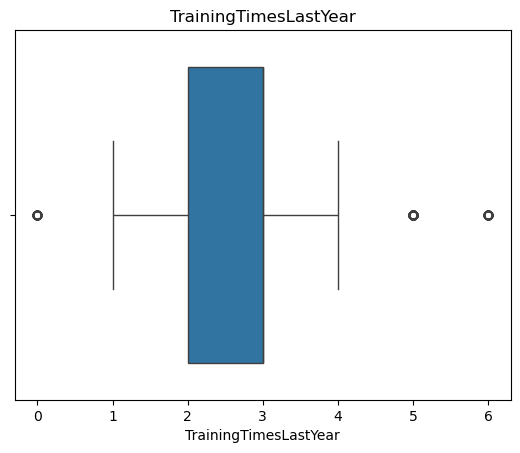

In [63]:
# handling the outliers of TrainingTimesLastYear
sns.boxplot(x=df.TrainingTimesLastYear)
plt.title('TrainingTimesLastYear')
plt.show()

In [64]:
df['TrainingTimesLastYear'].skew()

0.5320731985603981

In [65]:
Q1=df['TrainingTimesLastYear'].quantile(0.25)
Q3=df['TrainingTimesLastYear'].quantile(0.75)
print(Q1)
print(Q3)

2.0
3.0


In [66]:
IQR=Q3-Q1
IQR

1.0

In [67]:
lower_bound=Q1-(1.5*IQR)
lower_bound 

0.5

In [68]:
upper_bound=Q3+(1.5*IQR)
upper_bound

4.5

In [69]:
df.loc[df['TrainingTimesLastYear']<lower_bound]

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
55    E1001104   35      0                   1             2             1   
96    E1001179   53      0                   1             2             1   
104   E1001191   44      1                   1             1             1   
144   E1001269   31      1                   3             2             1   
153   E1001281   47      0                   1             2             5   
156   E1001284   38      1                   3             1             4   
165   E1001300   48      1                   1             2             4   
215   E1001385   26      1                   3             0             4   
232   E1001411   36      1                   1             2             4   
242   E1001434   18      1                   3             2             4   
247   E1001440   27      1                   1             1             4   
333   E1001590   36      0                   5             1             4   
343   E1001618   40      1                   1             0             4   
344   E1001622   34      1                   1             0             4   
351   E1001638   58      0                   3             1             4   
358   E1001647   35      0                   3             1             4   
361   E1001651   56      1                   1             1             4   
363   E1001653   40      0                   3             0             4   
368   E1001665   28      1                   1             1             5   
411   E1001745   34      0                   5             1             3   
414   E1001751   49      1                   5             1             4   
482   E1001868   29      1                   1             0             2   
487   E1001877   43      1                   5             0             2   
516   E1001925   27      0                   3             1             2   
517   E1001926   27      1                   3             2             2   
575   E1002025   30      0                   0             0             3   
615   E1002102   58      1                   3             0             5   
667   E1002194   31      0                   3             0             4   
680   E1002218   38      1                   1             0             4   
703   E1002251   55      1                   0             1             3   
762   E1002342   27      1                   1             1             4   
765    E100279   41      0                   1             2             5   
798    E100334   27      1                   1             2             5   
822    E100368   36      1                   3             1             1   
842    E100403   32      1                   3             2             5   
876    E100456   36      1                   3             0             1   
932    E100553   49      1                   1             0             1   
979    E100631   51      1                   1             1             1   
981    E100639   38      1                   1             1             5   
1002   E100670   44      1                   1             0             1   
1008   E100679   26      1                   2             2             5   
1034   E100717   32      0                   3             2             1   
1040   E100727   27      1                   2             1             5   
1068   E100772   21      0                   1             2             5   

     EmpJobRole BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
55           15                       2                 1                  4   
96            3                       2                23                  4   
104           3                       2                 9                  2   
144           3                       0                 9                  2   
153          13                       2                 4                  2   
156          1

In [70]:
len(df.loc[df['TrainingTimesLastYear']<lower_bound])/len(df)*100

3.6666666666666665

In [71]:
df.loc[df['TrainingTimesLastYear']<lower_bound,'TrainingTimesLastYear']=df['TrainingTimesLastYear'].median()

In [72]:
df.loc[df['TrainingTimesLastYear']>upper_bound]

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
10    E1001022   44      1                   3             2             1   
13    E1001027   29      1                   1             2             5   
27    E1001059   25      0                   3             2             5   
31    E1001064   34      1                   4             2             5   
59    E1001110   40      1                   3             2             1   
...        ...  ...    ...                 ...           ...           ...   
1158   E100919   26      1                   2             1             5   
1166   E100933   27      0                   3             0             1   
1184   E100968   29      0                   3             1             5   
1188   E100979   20      1                   3             2             1   
1193   E100988   29      1                   1             0             1   

     EmpJobRole BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
10            3                       0                24                  3   
13           14                       2                10                  3   
27           13                       2                26                  1   
31           13                       2                 2                  3   
59            3                       1                16                  4   
...         ...                     ...               ...                ...   
1158         13                       2                28                  2   
1166          3                       2                 6                  4   
1184         13                       2                 3                  2   
1188         15                       2                10                  1   
1193          3                       1                 1                  4   

      ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
10    ...                            3                           9   
13    ...                            3                           1   
27    ...                            2                           6   
31    ...                            3                           6   
59    ...                            4                          10   
...   ...                          ...                         ...   
1158  ...                            4                           6   
1166  ...                            3                           6   
1184  ...                            1                           6   
1188  ...                            4                           1   
1193  ...                            4                          10   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
10                        5                   3                             5   
13                        6                   3                             1   
27                        5                   2                             6   
31                        5                   3                             6   
59                        6                   3                             1   
...                     ...                 ...                           ...   
1158                      5                   4                             5   
1166                      5                   2                             5   
1184                      5                   2                             6   
1188                      5                   3                             1   
1193                      5                   3                            10   

      ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
10                               2                        1   
13                               0                        0   
27                               5                        1   
31                               5       

In [73]:
len(df.loc[df['TrainingTimesLastYear']>upper_bound])/len(df)*100

12.0

In [74]:
# the percentage of outliers is more then 5% keep as it is 

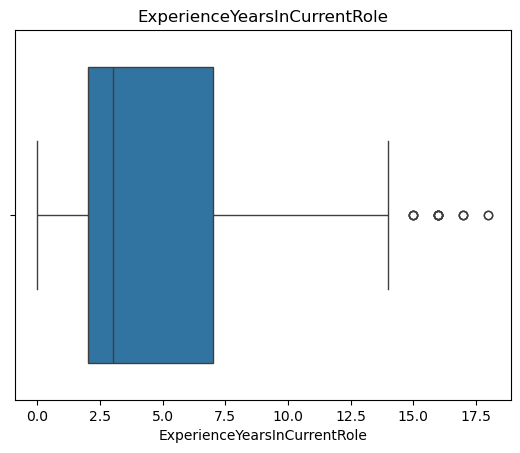

In [75]:
# handling the outliers ExperienceYearIncurrentRole
sns.boxplot(x=df.ExperienceYearsInCurrentRole)
plt.title('ExperienceYearsInCurrentRole')
plt.show()

In [76]:
df['ExperienceYearsInCurrentRole'].skew()

0.8881586703270758

In [77]:
Q1=df['ExperienceYearsInCurrentRole'].quantile(0.25)
Q1

2.0

In [78]:
Q3=df['ExperienceYearsInCurrentRole'].quantile(0.75)
Q3

7.0

In [79]:
IQR=Q3-Q1
IQR

5.0

In [80]:
lower_bound=Q1-(1.5*IQR)
lower_bound

-5.5

In [81]:
upper_bound=Q3+(1.5*IQR)
upper_bound

14.5

In [82]:
df.loc[df['ExperienceYearsInCurrentRole']<lower_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [83]:
len(df.loc[df['ExperienceYearsInCurrentRole']<lower_bound])/len(df)*100

0.0

In [84]:
df.loc[df['ExperienceYearsInCurrentRole']>upper_bound]

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
151   E1001277   41      1                   3             0             1   
175   E1001313   41      0                   1             0             4   
272   E1001482   46      0                   2             1             5   
361   E1001651   56      1                   1             1             4   
501   E1001899   35      1                   1             1             2   
555   E1001990   45      1                   1             1             4   
639   E1002141   46      0                   5             0             5   
658   E1002178   48      0                   3             0             4   
730   E1002293   38      0                   3             1             4   
817    E100359   59      0                   1             2             5   
864    E100440   51      1                   1             2             1   
921    E100537   52      1                   1             1             1   
956    E100597   42      1                   5             1             1   
999    E100665   42      1                   1             1             5   
1109   E100836   40      0                   1             1             5   
1152   E100903   41      0                   1             1             5   

     EmpJobRole BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
151           3                       1                 9                  3   
175          11                       0                 7                  1   
272           8                       2                 2                  3   
361           9                       2                23                  3   
501           4                       2                18                  5   
555           9                       0                 1                  1   
639          13                       2                 3                  3   
658           8                       1                22                  3   
730          11                       2                10                  3   
817          13                       2                25                  3   
864           3                       2                 6                  3   
921           3                       2                 1                  4   
956           3                       2                 4                  2   
999          13                       2                 1                  1   
1109          8                       2                 2                  4   
1152          8                       2                 2                  5   

      ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
151   ...                            2                          21   
175   ...                            2                          21   
272   ...                            1                          28   
361   ...                            1                          10   
501   ...                            4                          16   
555   ...                            4                          25   
639   ...                            4                          25   
658   ...                            2                          24   
730   ...                            1                          20   
817   ...                            4                          28   
864   ...                            3                          23   
921   ...                            1                          10   
956   ...                            4                          22   
999   ...                            3                          20   
1109  ...                            4                          21   
1152  ...                            2                          22   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
151                       2                  

In [85]:
len(df.loc[df['ExperienceYearsInCurrentRole']>upper_bound])/len(df)*100

1.3333333333333335

In [86]:
df.loc[df['ExperienceYearsInCurrentRole']>upper_bound,'ExperienceYearsInCurrentRole']=df['ExperienceYearsInCurrentRole'].median()

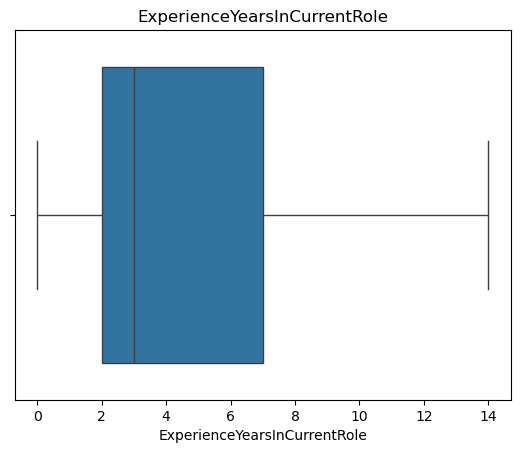

In [87]:
# Outliers are handle 
sns.boxplot(x=df.ExperienceYearsInCurrentRole)
plt.title('ExperienceYearsInCurrentRole')
plt.show()

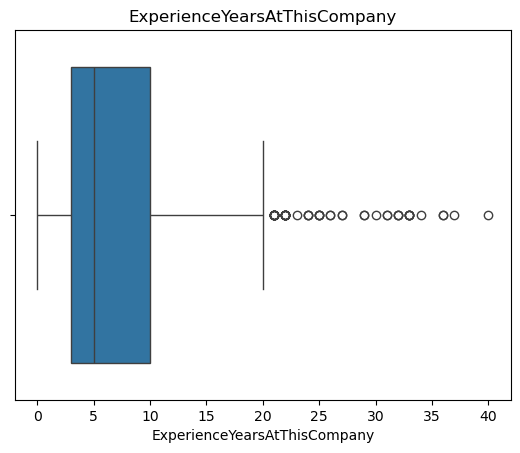

In [88]:
# Handle the outliers ExperienceYearsAtThisCompany
sns.boxplot(x=df.ExperienceYearsAtThisCompany)
plt.title('ExperienceYearsAtThisCompany')
plt.show()

In [89]:
df['ExperienceYearsAtThisCompany'].skew()

1.789054979919473

In [90]:
Q1=df['ExperienceYearsAtThisCompany'].quantile(0.25)
Q1

3.0

In [91]:
Q3=df['ExperienceYearsAtThisCompany'].quantile(0.75)
Q3

10.0

In [92]:
IQR=Q3-Q1
IQR

7.0

In [93]:
lower_bound=Q1-(1.5*IQR)
lower_bound

-7.5

In [94]:
upper_bound=Q3+(1.5*IQR)
upper_bound

20.5

In [95]:
df.loc[df['ExperienceYearsAtThisCompany']<lower_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [96]:
df.loc[df['ExperienceYearsAtThisCompany']>upper_bound]

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
3     E1001009   41      1                   0             0             3   
11    E1001024   47      0                   3             0             5   
25    E1001054   52      1                   2             1             5   
52    E1001098   47      0                   4             1             1   
100   E1001183   50      1                   1             0             1   
168   E1001304   39      0                   1             1             4   
175   E1001313   41      0                   1             0             4   
178   E1001316   52      0                   2             1             5   
181   E1001321   39      0                   3             2             4   
216   E1001387   42      1                   3             1             4   
252   E1001445   42      1                   1             2             5   
272   E1001482   46      0                   2             1             5   
304   E1001545   44      1                   2             1             5   
307   E1001555   45      0                   2             2             5   
308   E1001556   55      1                   3             0             4   
312   E1001560   51      1                   1             0             5   
316   E1001566   44      1                   1             0             4   
320   E1001571   43      0                   2             2             5   
347   E1001630   51      1                   1             0             3   
450   E1001817   50      1                   3             2             4   
459   E1001828   40      1                   3             2             3   
471   E1001850   53      0                   5             1             4   
475   E1001856   55      1                   2             1             5   
490   E1001884   50      1                   3             1             2   
492   E1001886   44      0                   3             0             2   
555   E1001990   45      1                   1             1             4   
557   E1001997   45      0                   5             2             4   
571   E1002018   40      1                   3             2             5   
613   E1002093   41      0                   2             0             5   
617   E1002105   47      0                   1             0             4   
642   E1002145   48      1                   1             1             4   
658   E1002178   48      0                   3             0             4   
777    E100301   53      0                   1             1             5   
785    E100314   44      0                   3             1             1   
816    E100358   50      0                   3             0             1   
817    E100359   59      0                   1             2             5   
838    E100397   40      1                   1             1             1   
845    E100409   58      1                   3             2             5   
862    E100436   43      1                   1             1             5   
867    E100443   58      0                   3             1             1   
911    E100522   46      0                   2             0             5   
921    E100537   52      1                   1             1             1   
956    E100597   42      1                   5             1             1   
962    E100607   52      1                   1             2             5   
978    E100630   40      1                   3             0             0   
989    E100652   55      1                   3             2             1   
1015   E100688   41      1                   1             2             5   
1024   E100703   45      1                   1             0             1   
1027   E100707   39      1                   3             1             1   
1036   E100722   39      1                   3             1             1   
1086   E100798   43      1 

In [97]:
len(df.loc[df['ExperienceYearsAtThisCompany']>upper_bound])/len(df)*100

4.666666666666667

In [98]:
df.loc[df['ExperienceYearsAtThisCompany']>upper_bound,'ExperienceYearsAtThisCompany']=df['ExperienceYearsAtThisCompany'].median()

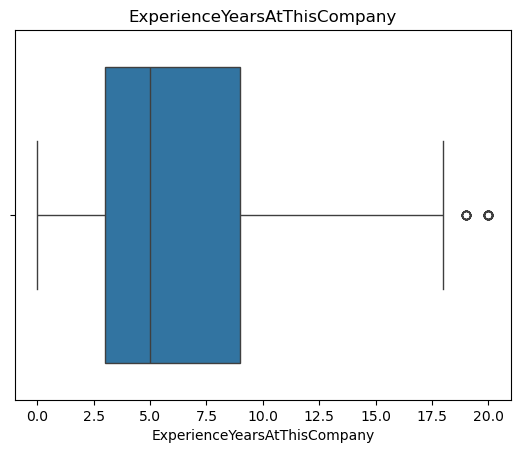

In [99]:
# Outliers are handle 
sns.boxplot(x=df.ExperienceYearsAtThisCompany)
plt.title('ExperienceYearsAtThisCompany')
plt.show()

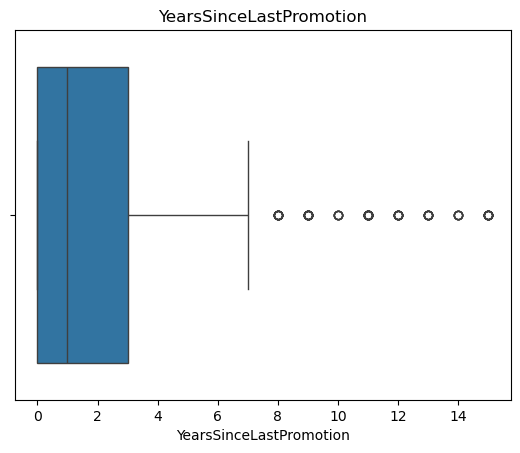

In [100]:
# Handle the outliers for YearsSinceLastPromotion
sns.boxplot(x=df.YearsSinceLastPromotion)
plt.title('YearsSinceLastPromotion')
plt.show()

In [101]:
df['YearsSinceLastPromotion'].skew()

1.9749315589155791

In [102]:
Q1=df['YearsSinceLastPromotion'].quantile(0.25)
Q1

0.0

In [103]:
Q3=df['YearsSinceLastPromotion'].quantile(0.75)
Q3

3.0

In [104]:
IQR=Q3-Q1
IQR

3.0

In [105]:
lower_bound=Q1-(1.5*IQR)
lower_bound

-4.5

In [106]:
upper_bound=Q3+(1.5*IQR)
upper_bound

7.5

In [107]:
df.loc[df['YearsSinceLastPromotion']<lower_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [108]:
df.loc[df['YearsSinceLastPromotion']>upper_bound]

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
3     E1001009   41      1                   0             0             3   
11    E1001024   47      0                   3             0             5   
100   E1001183   50      1                   1             0             1   
130   E1001239   31      0                   3             1             1   
132   E1001248   37      1                   1             1             5   
...        ...  ...    ...                 ...           ...           ...   
1152   E100903   41      0                   1             1             5   
1160   E100922   50      1                   3             1             3   
1181   E100961   34      1                   1             1             1   
1185   E100969   35      1                   1             2             1   
1189   E100980   33      1                   1             2             1   

     EmpJobRole BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
3             8                       2                10                  4   
11           13                       1                 3                  3   
100           3                       0                 2                  4   
130           3                       2                12                  3   
132          13                       2                 1                  4   
...         ...                     ...               ...                ...   
1152          8                       2                 2                  5   
1160          8                       1                 3                  3   
1181         15                       2                 1                  5   
1185         15                       2                 6                  4   
1189         15                       1                 3                  3   

      ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
3     ...                            2                          23   
11    ...                            4                          28   
100   ...                            4                          10   
130   ...                            3                          10   
132   ...                            3                          17   
...   ...                          ...                         ...   
1152  ...                            2                          22   
1160  ...                            3                          10   
1181  ...                            4                          10   
1185  ...                            2                          17   
1189  ...                            1                          10   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
3                         2                   2                             5   
11                        2                   2                             5   
100                       3                   3                             5   
130                       2                   1                             9   
132                       2                   1                            14   
...                     ...                 ...                           ...   
1152                      2                   3                            18   
1160                      2                   3                             5   
1181                      4                   2                            10   
1185                      3                   3                            17   
1189                      3                   3                            10   

      ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
3                                6                       12   
11                               2                       11   
100                              6                       14   
130                              7       

In [109]:
len(df.loc[df['YearsSinceLastPromotion']>upper_bound])/len(df)*100

7.333333333333333

In [110]:
# Here percentage of outlier is greater than 5%. So we keep it as it is.

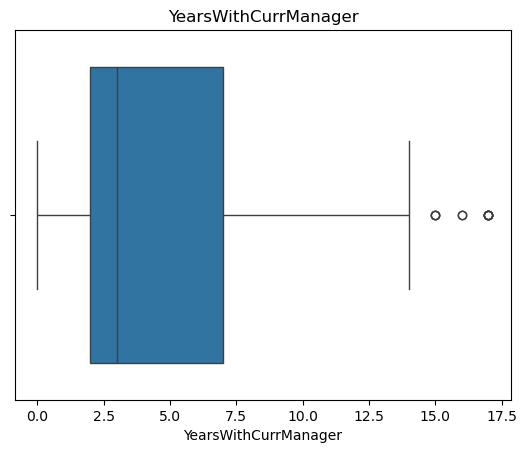

In [111]:
# Handle the Outliers YearsWithCurrManager
sns.boxplot(x=df.YearsWithCurrManager)
plt.title('YearsWithCurrManager')
plt.show()

In [112]:
df['YearsWithCurrManager'].skew()

0.8131582957766446

In [113]:
Q1=df['YearsWithCurrManager'].quantile(0.25)
Q1

2.0

In [114]:
Q3=df['YearsWithCurrManager'].quantile(0.75)
Q3

7.0

In [115]:
IQR=Q3-Q1
IQR

5.0

In [116]:
lower_bound=Q1-(1.5*IQR)
lower_bound

-5.5

In [117]:
upper_bound=Q3+(1.5*IQR)
upper_bound

14.5

In [118]:
df.loc[df['YearsWithCurrManager']<lower_bound]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [119]:
df.loc[df['YearsWithCurrManager']>upper_bound]

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
25    E1001054   52      1                   2             1             5   
72    E1001129   51      0                   2             1             5   
126   E1001235   41      1                   3             2             1   
283   E1001503   44      1                   4             2             4   
320   E1001571   43      0                   2             2             5   
655   E1002170   40      1                   1             0             4   
785    E100314   44      0                   3             1             1   
864    E100440   51      1                   1             2             1   
888    E100484   45      1                   1             0             1   
956    E100597   42      1                   5             1             1   
1083   E100793   37      0                   1             0             1   

     EmpJobRole BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
25            8                       2                 3                  4   
72            8                       2                26                  4   
126           3                       2                 6                  3   
283          12                       2                29                  4   
320          13                       2                 4                  4   
655           9                       2                 1                  4   
785           3                       2                 7                  4   
864           3                       2                 6                  3   
888           3                       2                 9                  3   
956           3                       2                 4                  2   
1083          2                       2                14                  3   

      ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
25    ...                            1                          10   
72    ...                            3                          10   
126   ...                            3                          20   
283   ...                            2                          20   
320   ...                            4                          23   
655   ...                            1                          22   
785   ...                            4                          24   
864   ...                            3                          23   
888   ...                            3                          20   
956   ...                            4                          22   
1083  ...                            3                          18   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
25                        3                   4                             5   
72                        2                   2                            20   
126                       3                   3                            18   
283                       3                   3                            20   
320                       3                   4                             5   
655                       3                   3                            19   
785                       4                   3                             5   
864                       5                   3                            20   
888                       2                   1                            17   
956                       3                   3                             5   
1083                      2                   2                            18   

      ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
25                               6                        1   
72                               6                        4   
126                             13                        2   
283                             11       

In [120]:
len(df.loc[df['YearsWithCurrManager']>upper_bound])/len(df)*100

0.9166666666666666

In [121]:
df.loc[df['YearsWithCurrManager']>upper_bound,'YearsWithCurrManager']=df['YearsWithCurrManager'].median()

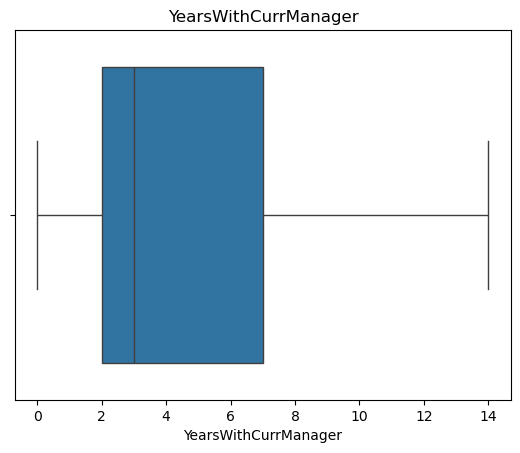

In [122]:
# outliers are handle
sns.boxplot(x=df.YearsWithCurrManager)
plt.title('YearsWithCurrManager')
plt.show()

### Scaling

In [124]:
from sklearn.preprocessing import RobustScaler

# Select only numerical columns (excluding ID & target)
num_cols = ['Age','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction',
            'EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
            'NumCompaniesWorked','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction',
            'TotalWorkExperienceInYears','TrainingTimesLastYear','EmpWorkLifeBalance',
            'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole',
            'YearsSinceLastPromotion','YearsWithCurrManager']

scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [125]:
df

EmpNumber       Age Gender EducationBackground MaritalStatus  \
0     E1001000 -0.307692      1                   2             2   
1     E1001006  0.846154      1                   2             2   
2     E1001007  0.307692      1                   1             1   
3     E1001009  0.384615      1                   0             0   
4     E1001010  1.846154      1                   2             2   
...        ...       ...    ...                 ...           ...   
1195   E100992 -0.692308      0                   3             0   
1196   E100993  0.076923      1                   1             2   
1197   E100994  1.076923      1                   3             1   
1198   E100995 -0.153846      0                   3             2   
1199   E100998 -0.923077      0                   1             2   

     EmpDepartment EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0                5         13                       2          0.250000   
1                5         13                       2          0.583333   
2                5         13                       1         -0.166667   
3                3          8                       2          0.250000   
4                5         13                       2          0.750000   
...            ...        ...                     ...               ...   
1195             5         13                       1         -0.333333   
1196             1         15                       2          0.250000   
1197             1         15                       2          1.750000   
1198             0          1                       2          0.166667   
1199             5         13                       2         -0.333333   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   0.0  ...                          0.5   
1                   0.5  ...                          0.5   
2                   0.5  ...                          0.0   
3                   0.5  ...                         -0.5   
4                   0.5  ...                          0.5   
...                 ...  ...                          ...   
1195               -1.0  ...                         -0.5   
1196               -0.5  ...                         -1.0   
1197               -1.0  ...                          0.0   
1198                0.0  ...                         -0.5   
1199               -0.5  ...                         -1.0   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          0.000                   -1.0                -1.0   
1                          1.250                   -1.0                 0.0   
2                          1.250                   -1.0                 0.0   
3                          1.625                   -1.0                -1.0   
4                          0.000                   -2.0                 0.0   
...                          ...                    ...                 ...   
1195                      -0.500                    0.0                 0.0   
1196                      -0.750                   -1.0                 0.0   
1197                       1.250                    0.0                 0.0   
1198                      -0.125                    0.0                 1.0   
1199                      -0.750                    0.0                 0.0   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                         0.833333                           0.8   
1                         0.333333                           0.8   
2                         2.166667                           2.0   
3                         0.000000                           0.6   
4                        -0.500000                          -0.2   
...                            ...                           ...   
1195                      0.166667                           0.4   
1196                     -0.666667               

### SMOTE 

In [127]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [128]:
# Seperate festure and target 
x=df.drop(columns=['EmpNumber','PerformanceRating'])
y=df['PerformanceRating']

In [129]:
# Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Handle Imbalance using SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote= smote.fit_resample(x_train, y_train)

In [130]:
from collections import Counter
print('Actual classes ',Counter(y_train))
print('Smote classes ',Counter(y_train_smote))

Actual classes  Counter({3: 699, 2: 155, 4: 106})
Smote classes  Counter({3: 699, 2: 699, 4: 699})


In [131]:
# Drop non-numeric or irrelevant columns (like 'EmpNumber')
df = df.drop(columns=['EmpNumber'])

In [132]:
df

Age Gender EducationBackground MaritalStatus EmpDepartment  \
0    -0.307692      1                   2             2             5   
1     0.846154      1                   2             2             5   
2     0.307692      1                   1             1             5   
3     0.384615      1                   0             0             3   
4     1.846154      1                   2             2             5   
...        ...    ...                 ...           ...           ...   
1195 -0.692308      0                   3             0             5   
1196  0.076923      1                   1             2             1   
1197  1.076923      1                   3             1             1   
1198 -0.153846      0                   3             2             0   
1199 -0.923077      0                   1             2             5   

     EmpJobRole BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0            13                       2          0.250000                0.0   
1            13                       2          0.583333                0.5   
2            13                       1         -0.166667                0.5   
3             8                       2          0.250000                0.5   
4            13                       2          0.750000                0.5   
...         ...                     ...               ...                ...   
1195         13                       1         -0.333333               -1.0   
1196         15                       2          0.250000               -0.5   
1197         15                       2          1.750000               -1.0   
1198          1                       2          0.166667                0.0   
1199         13                       2         -0.333333               -0.5   

      EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
0                            0.5  ...                          0.5   
1                            0.5  ...                          0.5   
2                            0.5  ...                          0.0   
3                           -0.5  ...                         -0.5   
4                           -1.0  ...                          0.5   
...                          ...  ...                          ...   
1195                         0.5  ...                         -0.5   
1196                         0.5  ...                         -1.0   
1197                         0.5  ...                          0.0   
1198                         0.5  ...                         -0.5   
1199                        -1.0  ...                         -1.0   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          0.000                   -1.0                -1.0   
1                          1.250                   -1.0                 0.0   
2                          1.250                   -1.0                 0.0   
3                          1.625                   -1.0                -1.0   
4                          0.000                   -2.0                 0.0   
...                          ...                    ...                 ...   
1195                      -0.500                    0.0                 0.0   
1196                      -0.750                   -1.0                 0.0   
1197                       1.250                    0.0                 0.0   
1198                      -0.125                    0.0                 1.0   
1199                      -0.750                    0.0                 0.0   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                         0.833333                           0.8   
1                         0.333333                           0.8   
2                         2.166667                           2.0   
3                         0.000000                           0.6   
4                        -0.500000         

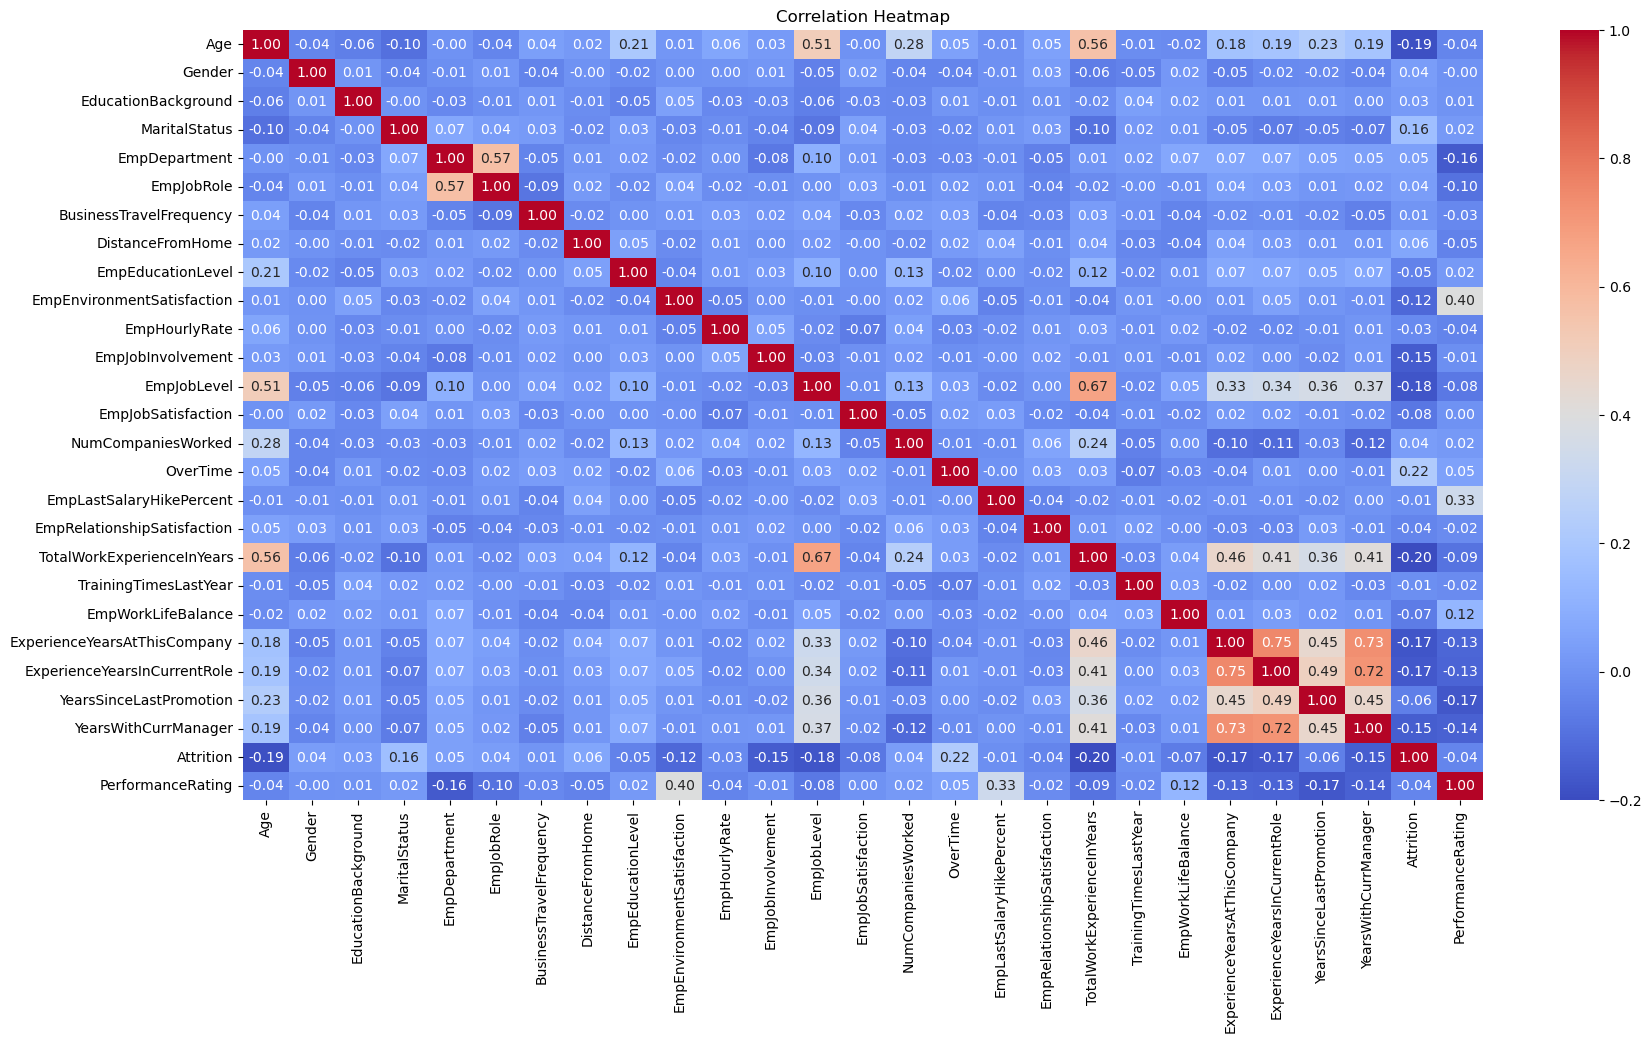

In [133]:
# Heatmap with numbers
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Insights 

##### 1. Work-life balance and job satisfaction have a small negative correlation with attrition.
##### * This means when employees are satisfied and have good work-life balance, they are less likely to leave the company.

##### 2.OverTime has a positive correlation with attrition.
##### * Employees who work overtime are more likely to leave the company.

##### 3.Total work experience and years at the company show negative correlation with attrition.
##### * Employees who have more experience or have stayed longer in the company usually don’t leave easily.

##### 4.Performance rating has very low correlation with attrition.
##### * Performance does not strongly decide whether an employee leaves or stays.

##### 5.Distance from home shows a small positive correlation with attrition.
##### * People who live far away from office have a slightly higher chance of leaving.

# Model Creation 

In [136]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
LR=LogisticRegression()
LR.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [137]:
y_train_predict=LR.predict(x_train_smote)
y_train_predict

array([3, 3, 3, ..., 2, 4, 3], dtype=int64)

In [138]:
from sklearn.metrics import confusion_matrix,classification_report

In [139]:
print(confusion_matrix(y_train_smote,y_train_predict))

[[624  62  13]
 [110 525  64]
 [ 11  43 645]]


In [140]:
print(classification_report (y_train_smote,y_train_predict))

              precision    recall  f1-score   support

           2       0.84      0.89      0.86       699
           3       0.83      0.75      0.79       699
           4       0.89      0.92      0.91       699

    accuracy                           0.86      2097
   macro avg       0.85      0.86      0.85      2097
weighted avg       0.85      0.86      0.85      2097



In [141]:
y_test_predict=LR.predict(x_test)
y_test_predict

array([3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 2, 3, 2, 2,
       2, 3, 2, 4, 4, 3, 3, 2, 3, 4, 4, 3, 3, 2, 3, 3, 4, 3, 3, 3, 4, 2,
       3, 4, 4, 3, 4, 3, 3, 2, 3, 4, 2, 3, 3, 2, 3, 3, 2, 4, 4, 4, 3, 2,
       2, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 4, 3, 3,
       3, 3, 2, 2, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3,
       4, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 2, 2, 3, 3, 3, 3, 4, 3, 3,
       3, 2, 3, 2, 3, 3, 2, 4, 3, 2, 2, 2, 3, 4, 3, 2, 3, 4, 2, 3, 3, 3,
       3, 4, 2, 2, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 2, 2, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 2, 2, 2, 2, 4,
       4, 3, 3, 4, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2],
      dtype=int64)

In [142]:
print(confusion_matrix(y_test,y_test_predict))

[[ 26  11   2]
 [ 26 135  14]
 [  3   5  18]]


In [143]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           2       0.47      0.67      0.55        39
           3       0.89      0.77      0.83       175
           4       0.53      0.69      0.60        26

    accuracy                           0.75       240
   macro avg       0.63      0.71      0.66       240
weighted avg       0.79      0.75      0.76       240



## K Nearest Neighbor(KNN)

In [145]:
from sklearn.neighbors import KNeighborsClassifier

In [146]:
# Finding optimal value for k to determine how many nearest neighbors to find 

In [147]:
error_rate=[]
for i in range (1,11):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_smote,y_train_smote)
    y_pred_i=knn.predict(x_test)
    error_rate.append(np.mean(y_pred_i!=y_test))
error_rate

[0.44166666666666665,
 0.5041666666666667,
 0.5416666666666666,
 0.5833333333333334,
 0.575,
 0.5958333333333333,
 0.5958333333333333,
 0.6125,
 0.6208333333333333,
 0.6083333333333333]

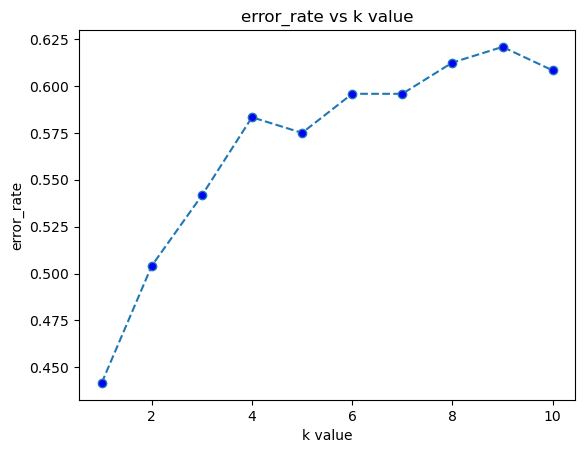

In [148]:
# lets plot K value and error rate 
plt.plot(range(1,11),error_rate,linestyle='dashed',marker='o',markerfacecolor='blue')
plt.title('error_rate vs k value')
plt.xlabel('k value')
plt.ylabel('error_rate')
plt.show()


In [149]:
# let fit the data into knn model 
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train_smote,y_train_smote)

KNeighborsClassifier()

In [150]:
y_train_predict=KNN.predict(x_train_smote)
y_train_predict

array([4, 2, 3, ..., 4, 4, 4], dtype=int64)

In [151]:
print(confusion_matrix(y_train_smote,y_train_predict))

[[696   3   0]
 [184 392 123]
 [  0   0 699]]


In [152]:
print(classification_report(y_train_smote,y_train_predict))

              precision    recall  f1-score   support

           2       0.79      1.00      0.88       699
           3       0.99      0.56      0.72       699
           4       0.85      1.00      0.92       699

    accuracy                           0.85      2097
   macro avg       0.88      0.85      0.84      2097
weighted avg       0.88      0.85      0.84      2097



In [153]:
y_test_predict=KNN.predict(x_test)
y_test_predict

array([3, 4, 3, 4, 4, 2, 2, 3, 2, 3, 2, 2, 2, 4, 4, 2, 4, 2, 4, 3, 2, 2,
       3, 3, 2, 4, 2, 2, 3, 2, 4, 2, 4, 4, 2, 2, 3, 4, 4, 3, 3, 3, 4, 4,
       4, 4, 2, 3, 2, 4, 2, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 4, 4, 2, 3, 4,
       2, 2, 3, 2, 2, 4, 2, 2, 3, 3, 4, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2,
       2, 3, 2, 2, 4, 4, 3, 4, 4, 2, 3, 3, 2, 4, 2, 4, 3, 2, 2, 3, 2, 3,
       2, 3, 4, 3, 3, 4, 3, 4, 2, 2, 4, 4, 2, 2, 2, 3, 2, 2, 3, 4, 2, 3,
       3, 2, 3, 2, 3, 3, 4, 4, 3, 2, 3, 2, 3, 3, 4, 2, 2, 2, 2, 3, 2, 4,
       2, 3, 2, 2, 2, 4, 2, 3, 2, 2, 4, 4, 4, 4, 3, 2, 4, 3, 2, 2, 2, 3,
       4, 2, 2, 2, 2, 4, 4, 3, 4, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 4,
       3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 4, 3, 2, 2, 3, 3, 4, 2, 2, 4, 4,
       4, 2, 3, 3, 2, 3, 4, 2, 4, 3, 2, 4, 2, 3, 3, 2, 3, 3, 3, 2],
      dtype=int64)

In [154]:
print(confusion_matrix(y_test,y_test_predict))

[[23 12  4]
 [69 65 41]
 [ 8  4 14]]


In [155]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           2       0.23      0.59      0.33        39
           3       0.80      0.37      0.51       175
           4       0.24      0.54      0.33        26

    accuracy                           0.42       240
   macro avg       0.42      0.50      0.39       240
weighted avg       0.65      0.42      0.46       240



## Support Vector Machine(SVM)

In [157]:
from sklearn.svm import SVC
SVC=SVC()
SVC.fit(x_train_smote,y_train_smote)

SVC()

In [158]:
y_train_predict=SVC.predict(x_train_smote)
y_train_predict

array([3, 2, 3, ..., 2, 4, 4], dtype=int64)

In [159]:
print(classification_report(y_train_smote,y_train_predict))

              precision    recall  f1-score   support

           2       0.85      0.93      0.89       699
           3       0.88      0.76      0.82       699
           4       0.90      0.93      0.91       699

    accuracy                           0.88      2097
   macro avg       0.88      0.88      0.87      2097
weighted avg       0.88      0.88      0.87      2097



In [160]:
y_test_predict=SVC.predict(x_test)
y_test_predict

array([3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 4, 3, 2, 3, 2, 2,
       3, 3, 2, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 2, 3, 3, 4, 3, 3, 3, 4, 3,
       3, 4, 4, 3, 4, 3, 3, 2, 4, 4, 3, 3, 3, 2, 3, 3, 2, 4, 4, 3, 3, 3,
       2, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 4, 3, 4,
       3, 3, 2, 2, 4, 3, 2, 4, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3,
       4, 3, 4, 3, 2, 3, 2, 3, 3, 3, 3, 4, 2, 2, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 2, 3, 2, 3, 3, 2, 4, 3, 2, 2, 2, 3, 4, 3, 2, 3, 2, 2, 3, 3, 4,
       3, 4, 3, 2, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 2, 2, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3, 3, 2, 2, 2, 2, 4,
       4, 3, 2, 4, 3, 3, 4, 3, 2, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 2],
      dtype=int64)

In [161]:
print(confusion_matrix(y_test,y_test_predict))

[[ 29   8   2]
 [ 25 134  16]
 [  4   5  17]]


In [162]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           2       0.50      0.74      0.60        39
           3       0.91      0.77      0.83       175
           4       0.49      0.65      0.56        26

    accuracy                           0.75       240
   macro avg       0.63      0.72      0.66       240
weighted avg       0.80      0.75      0.76       240



## Decision Tree

In [164]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

In [165]:
y_train_predict=DTC.predict(x_train_smote)
y_train_predict

array([3, 2, 3, ..., 4, 4, 4], dtype=int64)

In [166]:
print(confusion_matrix(y_train_smote,y_train_predict))

[[699   0   0]
 [  0 699   0]
 [  0   0 699]]


In [167]:
print(classification_report(y_train_smote,y_train_predict))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       699
           3       1.00      1.00      1.00       699
           4       1.00      1.00      1.00       699

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



In [168]:
y_test_predict=DTC.predict(x_test)
y_test_predict

array([3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3,
       2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3, 2, 2, 3,
       3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2,
       3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 2, 2, 3, 3, 2, 3, 3, 4, 4, 3,
       3, 3, 3, 4, 3, 3, 4, 4, 3, 2, 2, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 4, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 4, 3, 3, 4, 3, 2, 3, 2, 2, 2, 3,
       4, 3, 2, 4, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2],
      dtype=int64)

In [169]:
print(confusion_matrix(y_test,y_test_predict))

[[ 30   7   2]
 [  9 160   6]
 [  1   5  20]]


In [170]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           2       0.75      0.77      0.76        39
           3       0.93      0.91      0.92       175
           4       0.71      0.77      0.74        26

    accuracy                           0.88       240
   macro avg       0.80      0.82      0.81       240
weighted avg       0.88      0.88      0.88       240



## Random Forest 

In [172]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train_smote,y_train_smote)

RandomForestClassifier()

In [173]:
y_train_predict=RFC.predict(x_train_smote)
y_train_predict

array([3, 2, 3, ..., 4, 4, 4], dtype=int64)

In [174]:
print(confusion_matrix(y_train_smote,y_train_predict))

[[699   0   0]
 [  0 699   0]
 [  0   0 699]]


In [175]:
print(classification_report(y_train_smote,y_train_predict))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       699
           3       1.00      1.00      1.00       699
           4       1.00      1.00      1.00       699

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



In [176]:
y_test_predict=RFC.predict(x_test)
y_test_predict

array([3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3,
       2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3,
       3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 2, 3, 3, 4, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 4, 3, 2, 2, 2, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3,
       3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3,
       4, 3, 2, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2],
      dtype=int64)

In [177]:
print(confusion_matrix(y_test,y_test_predict))

[[ 33   6   0]
 [  3 169   3]
 [  0   7  19]]


In [178]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           2       0.92      0.85      0.88        39
           3       0.93      0.97      0.95       175
           4       0.86      0.73      0.79        26

    accuracy                           0.92       240
   macro avg       0.90      0.85      0.87       240
weighted avg       0.92      0.92      0.92       240



## Gradient Boosting 

In [180]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train_smote,y_train_smote)

GradientBoostingClassifier()

In [181]:
y_train_predict=GBC.predict(x_train_smote)
y_train_predict

array([3, 2, 3, ..., 4, 4, 4], dtype=int64)

In [182]:
print(confusion_matrix(y_train_smote,y_train_predict))

[[698   1   0]
 [  4 695   0]
 [  0   1 698]]


In [183]:
print(classification_report(y_train_smote,y_train_predict))

              precision    recall  f1-score   support

           2       0.99      1.00      1.00       699
           3       1.00      0.99      1.00       699
           4       1.00      1.00      1.00       699

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



In [184]:
y_test_predict=GBC.predict(x_test)
y_test_predict

array([3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3,
       2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 2, 3, 3, 4, 4, 3,
       3, 3, 3, 2, 3, 3, 3, 4, 3, 2, 2, 2, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3,
       3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3,
       4, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2],
      dtype=int64)

In [185]:
print(confusion_matrix(y_test,y_test_predict))

[[ 33   6   0]
 [  3 170   2]
 [  0   6  20]]


In [186]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           2       0.92      0.85      0.88        39
           3       0.93      0.97      0.95       175
           4       0.91      0.77      0.83        26

    accuracy                           0.93       240
   macro avg       0.92      0.86      0.89       240
weighted avg       0.93      0.93      0.93       240



# Summary 

## Key Findings 
##### 1. the dataset is the classification Problem
##### 2. the problem addressing is supervised classification problem 
##### 3. Best performance model ---> Random Forest(~0.93%) and 
##### Gradient Boosting (~0.93%) both achieved. both are the good prediction value for the employee performance.

## Top 3 Important Factors effecting employee performance
#### OverTime 
##### Employees who work frequent overtime show higher stress and are more likely to leave (affects performance).

#### JobSatisfaction 
##### Low satisfaction decreases productivity and increases attrition risk.

#### MonthlyIncome 
##### Salary is strongly tied to motivation and performance; underpaid employees show lower engagement.

## Strategic Recommendations
##### 1.Improve Work-Life Balance: Reduce unnecessary overtime and encourage flexible working hours.

##### 2.Increase Job Satisfaction: Conduct regular surveys and address employee concerns early.

##### 3.Retention Programs: Focus on employees with low income or less tenure, as they are at higher risk of leaving.

##### 4.Managerial Support: Train managers to engage better with employees, as relationship with manager strongly impacts attrition.

##### 5.Data Monitoring: Keep updating the dataset regularly and track attrition trends over time for more accurate predictions.

## Conclusion .

##### From the employee performance and attrition analysis, we found that OverTime, Job Satisfaction, and Work-Life Balance are the most important factors influencing employee performance and retention. Younger employees, those with low pay, and those with fewer years of experience at the company also showed higher attrition risk. By addressing these issues through better workload management, employee engagement programs, and fair compensation policies, the company can improve employee satisfaction, reduce attrition, and enhance overall performance.